# GOLD PRICE PREDICTION USING SPARK

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('Practice').getOrCreate()

In [4]:
df_pyspark=spark.read.option('header','true').csv('gld_price_data.csv')

In [5]:
df_pyspark.printSchema()

root
 |-- Date: string (nullable = true)
 |-- SPX: string (nullable = true)
 |-- GLD: string (nullable = true)
 |-- USO: string (nullable = true)
 |-- SLV: string (nullable = true)
 |-- EUR/USD: string (nullable = true)



In [6]:
df_pyspark.head(3)

[Row(Date='01-02-2008', SPX='1447.160034', GLD='84.860001', USO='78.470001', SLV='15.18', EUR/USD='1.471692'),
 Row(Date='01-03-2008', SPX='1447.160034', GLD='85.57', USO='78.370003', SLV='15.285', EUR/USD='1.474491'),
 Row(Date='01-04-2008', SPX='1411.630005', GLD='85.129997', USO='77.309998', SLV='15.167', EUR/USD='1.475492')]

In [7]:
df_pyspark.describe().show()

+-------+----------+-----------------+------------------+------------------+-----------------+------------------+
|summary|      Date|              SPX|               GLD|               USO|              SLV|           EUR/USD|
+-------+----------+-----------------+------------------+------------------+-----------------+------------------+
|  count|      2290|             2290|              2290|              2290|             2290|              2290|
|   mean|      NULL|1654.315776431877|122.73287507292564|  31.8422208567685|20.08499658515281|1.2836530519650649|
| stddev|      NULL|519.1115402032956|23.283345747117536|19.523517029775025|7.092566374075404|0.1315472161211381|
|    min|01-02-2008|      1002.630005|             100.5|                10|            10.06|          1.039047|
|    max| 9/30/2015|       998.039978|         99.910004|         99.800003|             9.98|          1.598798|
+-------+----------+-----------------+------------------+------------------+------------

In [8]:
df_pyspark=df_pyspark.drop("Date")

In [9]:
df_pyspark.select("SPX").show()

+-----------+
|        SPX|
+-----------+
|1447.160034|
|1447.160034|
|1411.630005|
|1416.180054|
|1390.189941|
|1409.130005|
|1420.329956|
| 1401.02002|
|    1416.25|
|1380.949951|
|1373.199951|
|    1333.25|
|1325.189941|
|     1310.5|
|1338.599976|
|1352.069946|
|1330.609985|
|1353.959961|
|1362.300049|
|1355.810059|
+-----------+
only showing top 20 rows



In [10]:
df_pyspark.na.drop(how="all")

DataFrame[SPX: string, GLD: string, USO: string, SLV: string, EUR/USD: string]

In [11]:
from pyspark.sql.functions import col 

In [12]:
df_pyspark = df_pyspark.select([col(c).cast("double").alias(c) for c in df_pyspark.columns])

In [13]:
df_pyspark.printSchema()

root
 |-- SPX: double (nullable = true)
 |-- GLD: double (nullable = true)
 |-- USO: double (nullable = true)
 |-- SLV: double (nullable = true)
 |-- EUR/USD: double (nullable = true)



In [14]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
assembler=VectorAssembler(inputCols=["SPX","SLV","USO"],outputCol="features")

In [16]:
assembler_df=assembler.transform(df_pyspark)

In [17]:
final_df=assembler_df.select("features","GLD")

In [18]:
lr=LinearRegression(featuresCol="features",labelCol="GLD")

In [19]:
lr_model=lr.fit(final_df)

In [20]:
print(lr_model.coefficients)

[0.0073023149208191526,3.12879478505057,-0.2978291424549379]


In [22]:
print(lr_model.intercept)

57.2942490531881


In [23]:
predictions=lr_model.transform(final_df)

In [27]:
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- GLD: double (nullable = true)
 |-- prediction: double (nullable = false)



In [31]:
predictions.select(["GLD","prediction"]).show()

+---------+-----------------+
|      GLD|       prediction|
+---------+-----------------+
|84.860001|91.98631909307898|
|    85.57| 92.3446248640965|
|85.129997|92.03167599870466|
|84.769997|92.24728943609719|
|86.779999| 93.5708805215992|
|86.550003|93.73141220832434|
|    88.25|95.87220962383823|
|88.580002|96.05824137814362|
|89.540001|96.45912096193715|
|87.989998|95.24371242172937|
|86.699997|94.90091782009615|
|     86.5|95.05052436726496|
|87.419998|95.81908971637188|
|88.169998|95.60618053511246|
|87.889999|96.11783931262694|
|90.080002|97.04182038705581|
|90.300003|96.58698478194758|
|    91.75|97.41490378142579|
|91.150002|97.23811429381078|
|92.059998|97.60209666247883|
+---------+-----------------+
only showing top 20 rows



In [33]:
import pandas
import matplotlib.pyplot as plt

In [34]:
pandas_df=predictions.select(["GLD","prediction"]).toPandas()

<AxesSubplot:>

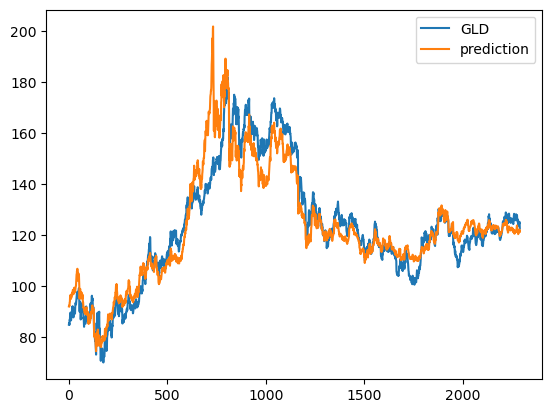

In [35]:
pandas_df.plot(kind="line")